In [111]:
!pip install -U kaleido

In [109]:
import pandas as pd
import plotly.express as px

In [23]:
try:
  df = pd.read_excel('/content/2022(3).xlsx', sheet_name = 'category')
except Exception as e:
  print(f'Ошибка: {e}')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID счета              500000 non-null  int64  
 1   state                 500000 non-null  object 
 2   Дата счета            500000 non-null  object 
 3   Регион                499998 non-null  object 
 4   ID плательщика        499999 non-null  float64
 5   Название плательщика  499989 non-null  object 
 6   ID поставщика         497834 non-null  float64
 7   Название поставщика   495396 non-null  object 
 8   ID заявки             500000 non-null  int64  
 9   ID позиции заявки     500000 non-null  int64  
 10  Название в заявке     499998 non-null  object 
 11  Кол-во в заявке       500000 non-null  float64
 12  ЕИ позиции заявки     500000 non-null  object 
 13  Категория             497754 non-null  object 
 14  ID позиции счета      500000 non-null  int64  
 15  

In [25]:
df[['Кол-во в заявке', 'Кол-во в счете']]

Кол-во в заявке  Кол-во в счете
0                   4.0             2.0
1                   4.0             1.0
2                 240.0           240.0
3                 300.0           300.0
4                  10.0            10.0
...                 ...             ...
499995              2.0             2.0
499996             20.0             8.7
499997             10.0            10.0
499998              6.0             6.0
499999             10.0            10.0

[500000 rows x 2 columns]

In [26]:
df.iloc[2]

ID счета                                                        260823946
state                                               ACCEPTED_BY_ACCEPTORS
Дата счета                                            2022-05-06 03:00:00
Регион                                                 г. Санкт-Петербург
ID плательщика                                                    56724.0
Название плательщика                                     ООО "СЭТЛ СТРОЙ"
ID поставщика                                                     54849.0
Название поставщика                                           АО "БЕАТОН"
ID заявки                                                        12895635
ID позиции заявки                                                13019010
Название в заявке       Смесь асфальтобетонная крупнозернистая пориста...
Кол-во в заявке                                                     240.0
ЕИ позиции заявки                                                       т
Категория                                      Асфальт, тротуарная плитка
ID позиции счета                                                 22254979
Название в счете        Пористая крупнозернистая марка 2 (гранит, БНД)...
Кол-во в счете                                                      240.0
ЕИ позиции счета                                                        т
Цена за ед                                                         3720.0
НДС включен?                                                         True
Процент НДС                                                           0.2
Сумма                                                            892800.0
Комплектность                                                         NaN
Name: 2, dtype: object

In [27]:
df.iloc[2]['Название в заявке']

'Смесь асфальтобетонная крупнозернистая пористая марка II'

In [28]:
df['ЕИ позиции заявки']

0           кг
1           кг
2            т
3         пара
4           шт
          ... 
499995    м.п.
499996      шт
499997      шт
499998      шт
499999      шт
Name: ЕИ позиции заявки, Length: 500000, dtype: object

In [29]:
# не рассматриваем примеры с комплектностью
df = df[df['Комплектность'].isna()].drop(['Комплектность'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468587 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID счета              468587 non-null  int64  
 1   state                 468587 non-null  object 
 2   Дата счета            468587 non-null  object 
 3   Регион                468585 non-null  object 
 4   ID плательщика        468586 non-null  float64
 5   Название плательщика  468576 non-null  object 
 6   ID поставщика         466423 non-null  float64
 7   Название поставщика   463985 non-null  object 
 8   ID заявки             468587 non-null  int64  
 9   ID позиции заявки     468587 non-null  int64  
 10  Название в заявке     468585 non-null  object 
 11  Кол-во в заявке       468587 non-null  float64
 12  ЕИ позиции заявки     468587 non-null  object 
 13  Категория             466590 non-null  object 
 14  ID позиции счета      468587 non-null  int64  
 15  Назва

In [30]:
df

ID счета                  state           Дата счета  \
0       260823883                   PAID  2022-05-06 03:00:00   
1       260823883                   PAID  2022-05-06 03:00:00   
2       260823946  ACCEPTED_BY_ACCEPTORS  2022-05-06 03:00:00   
3       260823961                    NEW  2022-05-04 03:00:00   
4       260823961                    NEW  2022-05-04 03:00:00   
...           ...                    ...                  ...   
499995  270881154                DELETED  2022-05-26 03:00:00   
499996  270881154                DELETED  2022-05-26 03:00:00   
499997  270881154                DELETED  2022-05-26 03:00:00   
499998  270881154                DELETED  2022-05-26 03:00:00   
499999  270881154                DELETED  2022-05-26 03:00:00   

                      Регион  ID плательщика  Название плательщика  \
0       Чувашская Республика        384042.0        ООО "СК-ЛЕРОН"   
1       Чувашская Республика        384042.0        ООО "СК-ЛЕРОН"   
2         г. Санкт-Петербург         56724.0      ООО "СЭТЛ СТРОЙ"   
3                  г. Москва        104925.0       ООО "СИТИСТРОЙ"   
4                  г. Москва        104925.0       ООО "СИТИСТРОЙ"   
...                      ...             ...                   ...   
499995    Московская область        135065.0  ООО "РУСБИЗНЕССТРОЙ"   
499996    Московская область        135065.0  ООО "РУСБИЗНЕССТРОЙ"   
499997    Московская область        135065.0  ООО "РУСБИЗНЕССТРОЙ"   
499998    Московская область        135065.0  ООО "РУСБИЗНЕССТРОЙ"   
499999    Московская область        135065.0  ООО "РУСБИЗНЕССТРОЙ"   

        ID поставщика              Название поставщика  ID заявки  \
0            127773.0            ООО "ТПП "ТЕХНОДЕКОР"   12864133   
1            127773.0            ООО "ТПП "ТЕХНОДЕКОР"   12864133   
2             54849.0                      АО "БЕАТОН"   12895635   
3             87156.0  ООО "ФИРМА "ОСНОВНОЙ ПОСТАВЩИК"   12884378   
4             87156.0  ООО "ФИРМА "ОСНОВНОЙ ПОСТАВЩИК"   12884378   
...               ...                              ...        ...   
499995       130185.0           ООО "КЛЮЧЕВЫЕ СИСТЕМЫ"   12956077   
499996       130185.0           ООО "КЛЮЧЕВЫЕ СИСТЕМЫ"   12956077   
499997       130185.0           ООО "КЛЮЧЕВЫЕ СИСТЕМЫ"   12956077   
499998       130185.0           ООО "КЛЮЧЕВЫЕ СИСТЕМЫ"   12956077   
499999       130185.0           ООО "КЛЮЧЕВЫЕ СИСТЕМЫ"   12956077   

        ID позиции заявки  ... ЕИ позиции заявки  \
0                12897510  ...                кг   
1                12897510  ...                кг   
2                13019010  ...                 т   
3                12978030  ...              пара   
4                12978034  ...                шт   
...                   ...  ...               ...   
499995           13259865  ...              м.п.   
499996           13259849  ...                шт   
499997           13259814  ...                шт   
499998           13259828  ...                шт   
499999           13259813  ...                шт   

                                           Категория ID позиции счета  \
0                            Лакокрасочные материалы         22254978   
1                            Лакокрасочные материалы         22254977   
2                         Асфальт, тротуарная плитка         22254979   
3                                                СИЗ         22254982   
4                                  Инструмент ручной         22254985   
...                                              ...              ...   
499995                  Металлические трубы (черные)         22877828   
499996  Запорно-регулирующая трубопроводная арматура         23047637   
499997                                Чугунные трубы         22877788   
499998                                Чугунные трубы         22877800   
499999                                Чугунные трубы         22877787   

                                         Название в счет

In [31]:
df[['Название в заявке', 'Название в счете']].head(10)

Название в заявке  \
0                      Грунт-эмаль 3 в.1 по ржавчине   
1                      Грунт-эмаль 3 в.1 по ржавчине   
2  Смесь асфальтобетонная крупнозернистая пориста...   
3             Перчатки с двойным латексным покрытием   
4             Налобный фонарь  ЯРКИЙ ЛУЧ LH-180 ACCU   
5  Кабель ПВС 2*1.5 ВМЕСТО КАБЕЛЯ приобрести \t\n...   
6  Маска сварщика хамелеон ,РАЗМЕР СВЕТОФИЛЬТРА: ...   
7                       Краги для сварщика (красные)   
8    Стекло защитное прозрачное, РАЗМЕР: 120 х 70 мм   
9                             #_Тумба под умывальник   

                                    Название в счете  
0  Грунт-эмаль З-в-1 Ferumprotect-201 Желтая ПОЛУ...  
1  Грунт-эмаль З-в-1 Ferumprotect-201 Желтая ПОЛУ...  
2  Пористая крупнозернистая марка 2 (гранит, БНД)...  
3                         ПЕРЧАТКИ х/б двойной облив  
4      ФОНАРЬ налобный, светодиодный, аккумуляторный  
5                       ВИЛКА 2P+E 1*16A каучук IP44  
6  МАСКА СВАРЩИКА FUBAG OPTIMA Visor Silver (4-8/...  
7                                    КРАГИ спилковые  
8                         СТЕКЛО покровное 121*69 мм  
9  Тумба под раковину Next 60, подвесная, 2 ящика...

In [37]:
df['Название в заявке'].iloc[1234]

'Воздуховод оцинкованный б=0.7мм  200х200   500мм'

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468587 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID счета              468587 non-null  int64  
 1   state                 468587 non-null  object 
 2   Дата счета            468587 non-null  object 
 3   Регион                468585 non-null  object 
 4   ID плательщика        468586 non-null  float64
 5   Название плательщика  468576 non-null  object 
 6   ID поставщика         466423 non-null  float64
 7   Название поставщика   463985 non-null  object 
 8   ID заявки             468587 non-null  int64  
 9   ID позиции заявки     468587 non-null  int64  
 10  Название в заявке     468585 non-null  object 
 11  Кол-во в заявке       468587 non-null  float64
 12  ЕИ позиции заявки     468587 non-null  object 
 13  Категория             466590 non-null  object 
 14  ID позиции счета      468587 non-null  int64  
 15  Назва

array([[<Axes: title={'center': 'Название в заявке'}>]], dtype=object)

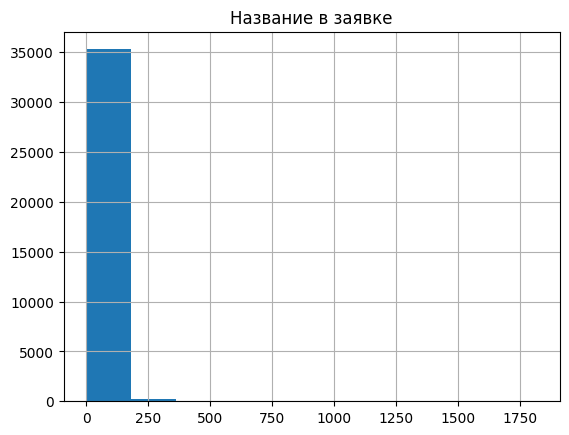

In [65]:
n_products = df[['ID заявки', 'Название в заявке']].groupby('ID заявки').count()
n_products.hist()

In [66]:
fig = px.box(n_products)
fig.show()

In [51]:
n_products.describe()

Название в заявке
count       35555.000000
mean           13.179159
std            36.895376
min             0.000000
25%             1.000000
50%             4.000000
75%            11.000000
max          1820.000000

In [67]:
n_products = n_products.rename(columns={'Название в заявке': 'Количество товаров в заявке'})

In [68]:
n_products

Количество товаров в заявке
ID заявки                             
4946896                              8
8178655                              1
8283639                              1
8285306                              4
8289424                              1
...                                ...
12981932                             1
12981964                             2
12981968                             1
12982023                             1
12982033                             1

[35555 rows x 1 columns]

In [69]:
n_products[n_products['Количество товаров в заявке'] == 1820]

Количество товаров в заявке
ID заявки                             
12951547                          1820

In [64]:
df[df['ID заявки'] == 12951547]

ID счета state           Дата счета     Регион  ID плательщика  \
353081  270839941   NEW  2022-05-25 03:00:00  г. Москва        104925.0   
353082  270839941   NEW  2022-05-25 03:00:00  г. Москва        104925.0   
353083  270839941   NEW  2022-05-25 03:00:00  г. Москва        104925.0   
353084  270839941   NEW  2022-05-25 03:00:00  г. Москва        104925.0   
353085  270839941   NEW  2022-05-25 03:00:00  г. Москва        104925.0   
...           ...   ...                  ...        ...             ...   
495226  270879647   NEW  2022-05-31 03:00:00  г. Москва        104925.0   
495227  270879647   NEW  2022-05-31 03:00:00  г. Москва        104925.0   
495228  270879647   NEW  2022-05-31 03:00:00  г. Москва        104925.0   
495229  270879647   NEW  2022-05-31 03:00:00  г. Москва        104925.0   
495230  270879647   NEW  2022-05-31 03:00:00  г. Москва        104925.0   

       Название плательщика  ID поставщика          Название поставщика  \
353081      ООО "СИТИСТРОЙ"        86564.0                    ООО "МКЗ"   
353082      ООО "СИТИСТРОЙ"        86564.0                    ООО "МКЗ"   
353083      ООО "СИТИСТРОЙ"        86564.0                    ООО "МКЗ"   
353084      ООО "СИТИСТРОЙ"        86564.0                    ООО "МКЗ"   
353085      ООО "СИТИСТРОЙ"        86564.0                    ООО "МКЗ"   
...                     ...            ...                          ...   
495226      ООО "СИТИСТРОЙ"       124730.0  ООО "ЮЖНЫЙ КАБЕЛЬНЫЙ ЦЕНТР"   
495227      ООО "СИТИСТРОЙ"       124730.0  ООО "ЮЖНЫЙ КАБЕЛЬНЫЙ ЦЕНТР"   
495228      ООО "СИТИСТРОЙ"       124730.0  ООО "ЮЖНЫЙ КАБЕЛЬНЫЙ ЦЕНТР"   
495229      ООО "СИТИСТРОЙ"       124730.0  ООО "ЮЖНЫЙ КАБЕЛЬНЫЙ ЦЕНТР"   
495230      ООО "СИТИСТРОЙ"       124730.0  ООО "ЮЖНЫЙ КАБЕЛЬНЫЙ ЦЕНТР"   

        ID заявки  ID позиции заявки  ... ЕИ позиции заявки  \
353081   12951547           13241113  ...                 м   
353082   12951547           13241158  ...                 м   
353083   12951547           13241183  ...                 м   
353084   12951547           13241152  ...                 м   
353085   12951547           13241092  ...                 м   
...           ...                ...  ...               ...   
495226   12951547           13241128  ...                 м   
495227   12951547           13241171  ...                 м   
495228   12951547           13241143  ...                 м   
495229   12951547           13241197  ...                 м   
495230   12951547           13241187  ...                 м   

                    Категория ID позиции счета  \
353081  Кабели с медной жилой         22699370   
353082  Кабели с медной жилой         22693238   
353083  Кабели с медной жилой         22699384   
353084  Кабели с медной жилой         22693232   
353085  Кабели с медной жилой         22693216   
...                       ...              ...   
495226  Кабели с медной жилой         22871611   
495227  Кабели с медной жилой         22871653   
495228  Кабели с медной жилой         22871626   
495229  Кабели с медной жилой         22871676   
495230  Кабели с медной жилой         22871667   

                                         Название в счете  Кол-во в счете  \
353081  Кабель силовой огнестойкий ВВГнг(А)-FRLS 5х4ок...           0.110   
353082      Кабель силовой ВВГнг(А)-LS 4х2,5ок 0,66кВ (N)           0.105   
353083      Кабель силовой ВВГнг(А)-LS 1х70мк 1кВ (Синий)           0.330   
353084   Кабель силовой ВВГнг(А)-LS 3х16мк 0,66кВ (N, PE)           0.040   
353085  Кабель силовой огнестойкий ВВГнг(А)-FRLS 1х150...           1.427   
...                                                   ...             ...   
495226         Кабель ВВГнг(А)-FRLS 5х2,5(ок) 0,66кВ ГОСТ          30.000   
495227             Кабель ВВГ-Пнг(А)-LS 3х2,5 0,66кВ-ГОСТ        2250.000   
495228           Кабель ВВГнг(А)-FRLS 5х4(ок) 0,66кВ ГОСТ         200.000   
495229              Кабель ВВГ-нг(А)-LS 3х1,5 0,66кВ-ГОСТ        7960.000   
49

In [76]:
35555 - 31497

4058

In [91]:
# оставляем данные, где количество не превышает верхней границы
n_products_down = n_products[n_products['Количество товаров в заявке'] <= 26]
n_products_down.describe()

Количество товаров в заявке
count                 31497.000000
mean                      5.257644
std                       5.723572
min                       0.000000
25%                       1.000000
50%                       3.000000
75%                       7.000000
max                      26.000000

Отдельно необходимо будет рассмотреть 4058 заявки, которые являются аномалиями, сейчас рассмотрим распределение по количеству товаров в заявке, значение которых не превышает верхнюю границу

In [78]:
n_products_down

Количество товаров в заявке
ID заявки                             
4946896                              8
8178655                              1
8283639                              1
8285306                              4
8289424                              1
...                                ...
12981932                             1
12981964                             2
12981968                             1
12982023                             1
12982033                             1

[31497 rows x 1 columns]

In [122]:
fig = px.histogram(n_products_down,
                   x='Количество товаров в заявке',
                   title='Распределение количества товаров в заявке',
                   width=1400,
                   height=800)
fig.update_layout(
    title={
        'text': 'Распределение количества товаров в заявке',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 20,
            'family': 'Arial Black'
        }
    },
    yaxis=dict(
        dtick=300,
        title='Количество заявок'
    ),
    xaxis=dict(
        dtick=1,
        title='Количество товаров'
    )
)
fig.show()

In [124]:
n_products_up = n_products[n_products['Количество товаров в заявке'] > 26]

fig = px.histogram(n_products_up,
                   x='Количество товаров в заявке',
                   title='Распределение количества товаров в заявке',
                   width=1400,
                   height=800)
fig.update_layout(
    title={
        'text': 'Распределение количества товаров в заявке',
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'size': 20,
            'family': 'Arial Black'
        }
    },
    yaxis=dict(
        dtick=50,
        title='Количество заявок'
    ),
    xaxis=dict(
        dtick=100,
        title='Количество товаров'
    )
)
fig.show()